# Bias/variance tradeoff

In [1]:
import pandas as pd
import numpy as np
from cytoolz import identity
import spacy

import matplotlib.pyplot as plt

%precision 4
%matplotlib inline

In [2]:
nlp = spacy.load('en', disable=['tagger', 'ner', 'parser'])

## Load data

In [3]:
df = pd.read_msgpack('http://bulba.sdsu.edu/rcv1_train.dat')

## Tokenize

In [4]:
%%time 

def tokenize(text):
    return [tok.orth_ for tok in nlp.tokenizer(text)]
df['tokens'] = df['text'].apply(tokenize)

CPU times: user 24.1 s, sys: 168 ms, total: 24.2 s
Wall time: 24.2 s


## Import sklearn

In [5]:
from sklearn.model_selection import *
from sklearn.naive_bayes import *
from sklearn.linear_model import *
from sklearn.svm import *
from sklearn.ensemble import *
from sklearn.dummy import *
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import *
from sklearn.model_selection import *

In [7]:
model = make_pipeline(CountVectorizer(analyzer=identity), MultinomialNB())     

In [13]:
min_dfs = [ ]
results = [ ]
for min_df in [1, 2, 3, 5, 10, 25]:
    print(min_df, end=' ', flush=True)
    model.set_params(countvectorizer__min_df=min_df, countvectorizer__max_df=1.0)
    min_dfs.append(min_df)
    results.append(learning_curve(model, df['tokens'], df['politics'], 
        train_sizes=[100, 1000, 2000, 5000, 7500, 10000], cv=5, n_jobs=-1))

1 2 3 5 10 25 

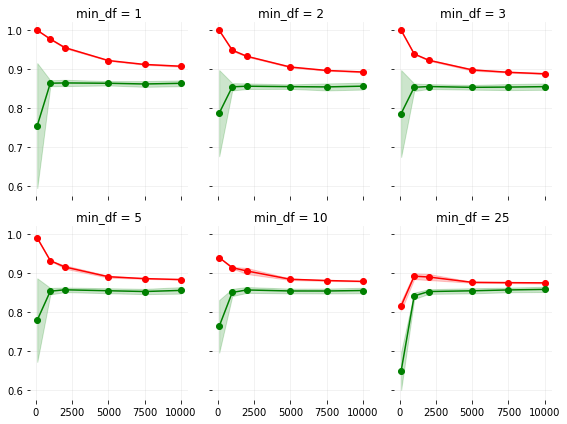

In [25]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(8, 6))
for (ax, min_df, (train_size, train_scores, valid_scores)) in zip(axes.flat, min_dfs, results):
    ax.set_title(f'min_df = {min_df}')
    ax.grid(alpha=0.2)
    ax.set_frame_on(False)
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    valid_mean = valid_scores.mean(axis=1)
    valid_std = valid_scores.std(axis=1)
    ax.fill_between(train_size, train_mean - train_std,
                     train_mean + train_std, alpha=0.2,
                     color='r')    
    ax.fill_between(train_size, valid_mean - valid_std,
                     valid_mean + valid_std, alpha=0.2,
                     color='g')    
    ax.plot(train_size, train_mean, 'o-', color='red')
    ax.plot(train_size, valid_mean, 'o-', color='green')
fig.tight_layout()    

In [30]:
alphas = [ ]
results = [ ]
for alpha in [0.0000001, 0.1, 0.5, 1.0, 2.0, 100.0]:
    print(alpha, end=' ', flush=True)
    model.set_params(multinomialnb__alpha=alpha,
                     countvectorizer__min_df=2, 
                     countvectorizer__max_df=0.5)
    alphas.append(alpha)
    results.append(learning_curve(model, df['tokens'], df['politics'], 
        train_sizes=[100, 1000, 2000, 5000, 7500, 10000], cv=5, n_jobs=-1))

1e-07 0.1 0.5 1.0 2.0 100.0 

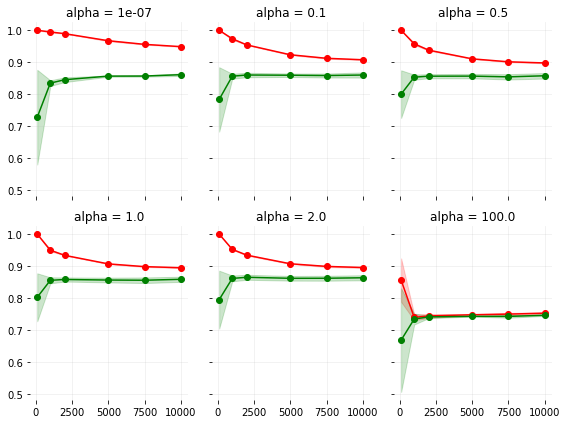

In [31]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(8, 6))
for (ax, alpha, (train_size, train_scores, valid_scores)) in zip(axes.flat, alphas, results):
    ax.set_title(f'alpha = {alpha}')
    ax.grid(alpha=0.2)
    ax.set_frame_on(False)
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    valid_mean = valid_scores.mean(axis=1)
    valid_std = valid_scores.std(axis=1)
    ax.fill_between(train_size, train_mean - train_std,
                     train_mean + train_std, alpha=0.2,
                     color='r')    
    ax.fill_between(train_size, valid_mean - valid_std,
                     valid_mean + valid_std, alpha=0.2,
                     color='g')    
    ax.plot(train_size, train_mean, 'o-', color='red')
    ax.plot(train_size, valid_mean, 'o-', color='green')
fig.tight_layout()    